In [51]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('seaborn')
sns.set(font_scale=2)
import warnings; warnings.filterwarnings('ignore')

In [52]:
df_vnd = pd.read_excel('FiinTrade_Giá_VND_20230426.xlsx')
print(df_vnd)

           NGÀY           GIÁ  THAY ĐỔI  %THAY ĐỔI            MỞ  \
0    2023-04-25  14600.000000      -350  -0.023411  14950.000000   
1    2023-04-24  14950.000000      -100  -0.006645  15050.000000   
2    2023-04-21  15050.000000       200   0.013468  14850.000000   
3    2023-04-20  14850.000000       -50  -0.003356  14900.000000   
4    2023-04-19  14900.000000      -300  -0.019737  15300.000000   
...         ...           ...       ...        ...           ...   
2061 2015-01-09   2054.778057       300   0.023438   2007.722071   
2062 2015-01-08   2007.722071      -200  -0.015385   2023.407400   
2063 2015-01-07   2039.092729         0   0.000000   2023.407400   
2064 2015-01-06   2039.092729       500   0.040000   1929.295428   
2065 2015-01-05   1960.666085      -100  -0.007937   2007.722071   

               CAO          THẤP        GIÁ_TB   KL KHỚP       GT KHỚP  \
0     15100.000000  14550.000000  14791.751103  13474280  199308196050   
1     15150.000000  14750.000000  1

In [53]:
df_ssi = pd.read_excel('FiinTrade_Giá_SSI_20230426.xlsx')
print(df_ssi)

          NGÀY       GIÁ  THAY ĐỔI  %THAY ĐỔI        MỞ       CAO      THẤP  \
0   2023-04-25  21100.00      -400  -0.018605  21650.00  21700.00  20950.00   
1   2023-04-24  21500.00      -150  -0.006928  21700.00  21900.00  21450.00   
2   2023-04-21  21650.00       550   0.026066  21400.00  22200.00  21350.00   
3   2023-04-20  21100.00      -200  -0.009390  21200.00  21400.00  21050.00   
4   2023-04-19  21300.00      -450  -0.020690  21800.00  21850.00  21250.00   
..         ...       ...       ...        ...       ...       ...       ...   
295 2022-02-21  41556.40       800   0.017699  40924.02  41917.76  40924.02   
296 2022-02-18  40833.68       200   0.004444  40201.30  41375.72  40110.96   
297 2022-02-17  40653.00       100   0.002227  40472.32  40788.51  40472.32   
298 2022-02-16  40562.66       700   0.015837  40381.98  40743.34  40020.62   
299 2022-02-15  39930.28       600   0.013761  39930.28  40381.98  39162.39   

           GIÁ_TB   KL KHỚP       GT KHỚP  KL THỎA 

In [54]:
#fig=make_subplots(specs=[[{"secondary_y":True}]])
fig = go.Figure(go.Candlestick(x=df_vnd['NGÀY'],open=df_vnd['MỞ'],high=df_vnd['CAO'],low=df_vnd['THẤP'],close=df_vnd['GIÁ_TB']))
#fig.add_trace(go.Scatter(x=ds_df['Date'],y=ds_df['Close'],mode='lines',name='Close'))
fig.update_layout(title='Candlestick', yaxis_title='VND',width=800,height=500,)
fig.update_yaxes()
fig.show()

In [55]:
#fig=make_subplots(specs=[[{"secondary_y":True}]])
fig = go.Figure(go.Candlestick(x=df_ssi['NGÀY'],open=df_ssi['MỞ'],high=df_ssi['CAO'],low=df_ssi['THẤP'],close=df_ssi['GIÁ_TB']))
#fig.add_trace(go.Scatter(x=ds_df['Date'],y=ds_df['Close'],mode='lines',name='Close'))
fig.update_layout(title='Candlestick', yaxis_title='VND',width=800,height=500,)
fig.update_yaxes()
fig.show()

In [56]:
company_list = [df_vnd, df_ssi]
company_name = ["VND", "SSI"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


In [57]:
#VND
ewma = pd.Series.ewm
df_vnd['rolling_ema_12'] = df_vnd.GIÁ_TB.ewm(min_periods=12, span=12).mean()
df_vnd['rolling_ema_26'] = df_vnd.GIÁ_TB.ewm(min_periods=26, span=26).mean()

#SSI
ewma = pd.Series.ewm
df_ssi['rolling_ema_12'] = df_ssi.GIÁ_TB.ewm(min_periods=12, span=12).mean()
df_ssi['rolling_ema_26'] = df_ssi.GIÁ_TB.ewm(min_periods=26, span=26).mean()

In [58]:
#VND
fig=make_subplots(specs=[[{"secondary_y":True}]])
#fig = go.Figure(go.Candlestick(x=ds_df['Date'],open=ds_df['Open'],high=ds_df['High'],low=ds_df['Low'],close=ds_df['Close']))
fig.add_trace(go.Scatter(x=df_vnd['NGÀY'], y=df_vnd['GIÁ_TB'],mode='lines',name='GIÁ_TB'))
fig.add_trace(go.Scatter(x=df_vnd['NGÀY'], y=df_vnd['rolling_ema_12'], mode='lines', name='EMA_12'))
fig.add_trace(go.Scatter(x=df_vnd['NGÀY'], y=df_vnd['rolling_ema_26'], mode='lines', name='EMA_26'))
fig.update_layout(title='Exponential Moving Average', yaxis_title='VND',width=800,height=500,)
fig.update_yaxes()
fig.show()

#SSI
fig=make_subplots(specs=[[{"secondary_y":True}]])
#fig = go.Figure(go.Candlestick(x=ds_df['Date'],open=ds_df['Open'],high=ds_df['High'],low=ds_df['Low'],close=ds_df['Close']))
fig.add_trace(go.Scatter(x=df_ssi['NGÀY'], y=df_ssi['GIÁ_TB'],mode='lines',name='GIÁ_TB'))
fig.add_trace(go.Scatter(x=df_ssi['NGÀY'], y=df_ssi['rolling_ema_12'], mode='lines', name='EMA_12'))
fig.add_trace(go.Scatter(x=df_ssi['NGÀY'], y=df_ssi['rolling_ema_26'], mode='lines', name='EMA_26'))
fig.update_layout(title='Exponential Moving Average', yaxis_title='VND',width=800,height=500,)
fig.update_yaxes()
fig.show()


In [60]:
df_vnd['close_12EMA'] = ewma(df_vnd["GIÁ_TB"], span=12).mean()
df_vnd['close_26EMA'] = ewma(df_vnd["GIÁ_TB"], span=26).mean()
df_vnd['MACD'] = df_vnd['close_12EMA'] - df_vnd['close_26EMA']
df_vnd['MACD_Signal'] = ewma(df_vnd["MACD"], span=9).mean()

In [61]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=df_vnd['NGÀY'], y=df_vnd['GIÁ_TB'],mode='lines',name='GIÁ_TB'),secondary_y=True,)
fig.add_trace(go.Scatter(x=df_vnd['NGÀY'], y=df_vnd['MACD'], mode='lines', name='MACD'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df_vnd['NGÀY'], y=df_vnd['MACD_Signal'], mode='lines', name='MACD_Signal'),secondary_y=False,)
fig.update_layout(autosize=False,width=800,height=400,title_text="MACD")
fig.update_xaxes(title_text="NGÀY")
fig.update_yaxes(title_text="MACD",secondary_y=False)
fig.update_yaxes(title_text="VND",secondary_y=True)
fig.show()

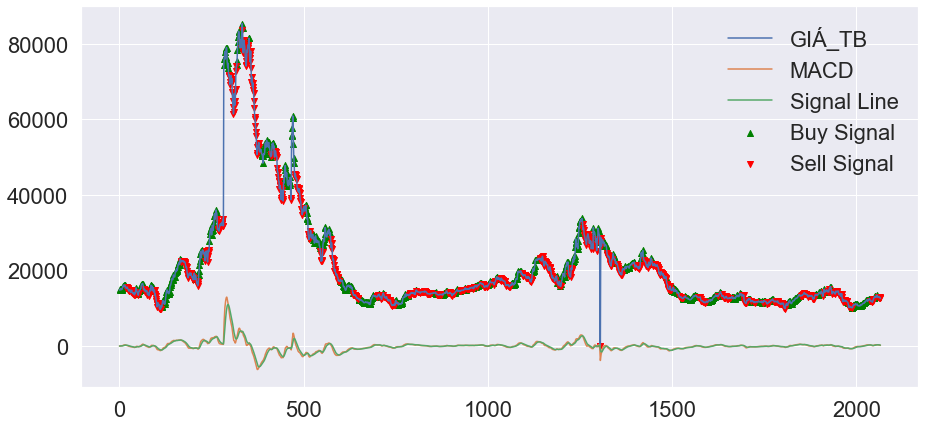

In [63]:
# Compute the MACD indicator
exp1 = df_vnd['GIÁ_TB'].ewm(span=12, adjust=False).mean()
exp2 = df_vnd['GIÁ_TB'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
signal = macd.ewm(span=9, adjust=False).mean()

# Generate buy and sell signals
df_vnd['MACD'] = macd
df_vnd['Signal Line'] = signal
df_vnd['Signal'] = 0
df_vnd.loc[macd > signal, 'Signal'] = 1  # Buy signal
df_vnd.loc[macd < signal, 'Signal'] = -1  # Sell signal

# Visualize the signals
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_vnd.index, df_vnd['GIÁ_TB'], label='GIÁ_TB')
ax.plot(df_vnd.index, df_vnd['MACD'], label='MACD')
ax.plot(df_vnd.index, df_vnd['Signal Line'], label='Signal Line')
ax.scatter(df_vnd[df_vnd['Signal']==1].index, df_vnd[df_vnd['Signal']==1]['GIÁ_TB'], marker='^', color='green', label='Buy Signal')
ax.scatter(df_vnd[df_vnd['Signal']==-1].index, df_vnd[df_vnd['Signal']==-1]['GIÁ_TB'], marker='v', color='red', label='Sell Signal')
plt.legend()
plt.show()